In [1]:
%matplotlib inline

import QSTK.qstkutil.qsdateutil as du
import QSTK.qstkutil.tsutil as tsu
import QSTK.qstkutil.DataAccess as da

import datetime as dt
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
ls_symbols = ["AAPL", "GLD", "GOOG", "$SPX", "XOM"]
dt_start = dt.datetime(2006,1,1)
dt_end = dt.datetime(2010, 12, 31)
dt_timeofday = dt.timedelta(hours=16)

#get dates that are market - open days
ldt_timestamps = du.getNYSEdays(dt_start, dt_end, dt_timeofday)

In [7]:
# grab the data 
c_dataobj = da.DataAccess("Yahoo")
ls_keys = ['open', 'high', 'low', 'close', 'volume', 'actual_close']

ldf_data = c_dataobj.get_data(ldt_timestamps, ls_symbols, ls_keys)
d_data = dict(zip(ls_keys, ldf_data))

Text(0.5,0,'Date')

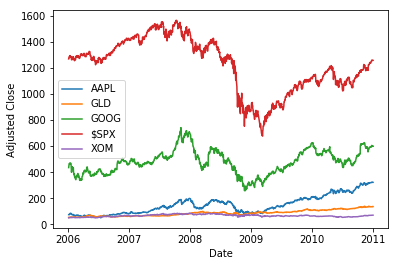

In [8]:
na_price = d_data['close'].values
plt.clf()
plt.plot(ldt_timestamps, na_price)
plt.legend(ls_symbols)
plt.ylabel('Adjusted Close')
plt.xlabel('Date')

In [9]:
print(na_price)

[[  74.43   53.12  435.23 1268.8    50.47]
 [  74.65   53.3   445.24 1273.46   50.56]
 [  74.06   52.34  451.24 1273.48   50.31]
 ...
 [ 324.08  137.22  598.92 1258.51   70.38]
 [ 323.9   137.71  601.   1259.78   70.34]
 [ 322.28  137.03  598.86 1257.88   70.33]]


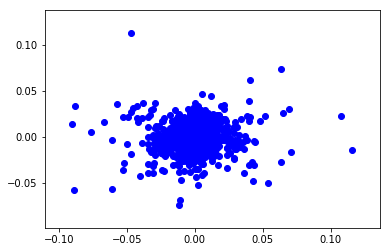

In [5]:
#normalization of prices
na_normalized_price = na_price / na_price[0, :]
na_rets = na_normalized_price.copy()
tsu.returnize0(na_rets)

plt.scatter(na_rets[:, 3], na_rets[:, 1], c='blue')